In [2]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
credit = pd.read_csv('credit.csv')

In [5]:
credit.head()
credit.tail()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
395,396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,397,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0
399,400,18.701,5524,415,5,64,7,Female,No,No,Asian,966


In [6]:
credit = credit.iloc[:,1:]
credit.sample(10)
credit.info()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
271,44.978,4866,347,1,30,10,Female,No,No,Caucasian,436
128,123.299,8376,610,2,89,17,Male,Yes,No,African American,1259
41,113.659,7659,538,2,66,15,Male,Yes,Yes,African American,1155
337,12.414,855,119,3,32,12,Male,No,Yes,African American,0
259,33.657,6196,450,6,55,9,Female,No,No,Caucasian,1092
311,23.375,5429,396,3,57,15,Female,No,Yes,Caucasian,844
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
263,29.725,3536,270,2,52,15,Female,No,No,African American,133
33,31.367,1829,162,4,30,10,Male,No,Yes,Caucasian,0
264,27.999,5107,380,1,55,10,Male,No,Yes,Caucasian,651


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
Income       400 non-null float64
Limit        400 non-null int64
Rating       400 non-null int64
Cards        400 non-null int64
Age          400 non-null int64
Education    400 non-null int64
Gender       400 non-null object
Student      400 non-null object
Married      400 non-null object
Ethnicity    400 non-null object
Balance      400 non-null int64
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


# Creating dependent variable

In [7]:
credit['Balance_Per_Card'] = credit['Balance']/credit['Cards']
credit.head(10)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Balance_Per_Card
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,166.500000
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,301.000000
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,145.000000
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,321.333333
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,165.500000
5,80.180,8047,569,4,77,10,Male,No,No,Caucasian,1151,287.750000
6,20.996,3388,259,2,37,12,Female,No,No,African American,203,101.500000
7,71.408,7114,512,2,87,9,Male,No,No,Asian,872,436.000000
8,15.125,3300,266,5,66,13,Female,No,No,Caucasian,279,55.800000
9,71.061,6819,491,3,41,19,Female,Yes,Yes,African American,1350,450.000000


# Since we have added a new feature Balance_Per_Card which is the ratio of card and balance. So we are dropping these variables

In [8]:
credit = credit.drop(['Cards', 'Balance'], 1)
credit.head(5)

,Income,Limit,Rating,Age,Education,Gender,Student,Married,Ethnicity,Balance_Per_Card
0,14.891,3606,283,34,11,Male,No,Yes,Caucasian,166.500000
1,106.025,6645,483,82,15,Female,Yes,Yes,Asian,301.000000
2,104.593,7075,514,71,11,Male,No,No,Asian,145.000000
3,148.924,9504,681,36,11,Female,No,No,Asian,321.333333
4,55.882,4897,357,68,16,Male,No,Yes,Caucasian,165.500000


# Exploratory Data Analysis

In [9]:
print('Column Name \n')
credit.columns

print('Describe \n')
credit.describe()

print('Info \n')
credit.info()

print('Shape \n')
credit.shape

print('Non Missing Values \n')
credit.count()

print('Missing Values \n')
credit.isna().sum()



Column Name 



Index(['Income', 'Limit', 'Rating', 'Age', 'Education', 'Gender', 'Student',
       'Married', 'Ethnicity', 'Balance_Per_Card'],
      dtype='object')

Describe 



,Income,Limit,Rating,Age,Education,Balance_Per_Card
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,55.667500,13.450000,220.949879
std,35.244273,2308.198848,154.724143,17.249807,3.125207,249.951792
min,10.354000,855.000000,93.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,41.750000,11.000000,22.562500
50%,33.115500,4622.500000,344.000000,56.000000,14.000000,167.433333
75%,57.470750,5872.750000,437.250000,70.000000,16.000000,314.375000
max,186.634000,13913.000000,982.000000,98.000000,20.000000,1448.000000


Info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
Income              400 non-null float64
Limit               400 non-null int64
Rating              400 non-null int64
Age                 400 non-null int64
Education           400 non-null int64
Gender              400 non-null object
Student             400 non-null object
Married             400 non-null object
Ethnicity           400 non-null object
Balance_Per_Card    400 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 31.3+ KB
Shape 



(400, 10)

Non Missing Values 



Income              400
Limit               400
Rating              400
Age                 400
Education           400
Gender              400
Student             400
Married             400
Ethnicity           400
Balance_Per_Card    400
dtype: int64

Missing Values 



Income              0
Limit               0
Rating              0
Age                 0
Education           0
Gender              0
Student             0
Married             0
Ethnicity           0
Balance_Per_Card    0
dtype: int64

# Find out the mean and median values of the numerical variables by categorical variables

In [10]:
for col in credit.columns:
    if credit[col].dtype =='object':
        print(np.round(credit.groupby(col)['Balance_Per_Card'].mean(), 2))

Gender
Female    213.59
Male      228.85
Name: Balance_Per_Card, dtype: float64
Student
No     203.02
Yes    382.29
Name: Balance_Per_Card, dtype: float64
Married
No     218.71
Yes    222.37
Name: Balance_Per_Card, dtype: float64
Ethnicity
African American    212.17
Asian               220.45
Caucasian           225.57
Name: Balance_Per_Card, dtype: float64


In [11]:
for col in credit.columns:
    if credit[col].dtype =='object':
        np.round(credit.groupby(col)['Balance_Per_Card'].mean(), 2)

Gender
Female    213.59
Male      228.85
Name: Balance_Per_Card, dtype: float64

Student
No     203.02
Yes    382.29
Name: Balance_Per_Card, dtype: float64

Married
No     218.71
Yes    222.37
Name: Balance_Per_Card, dtype: float64

Ethnicity
African American    212.17
Asian               220.45
Caucasian           225.57
Name: Balance_Per_Card, dtype: float64

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


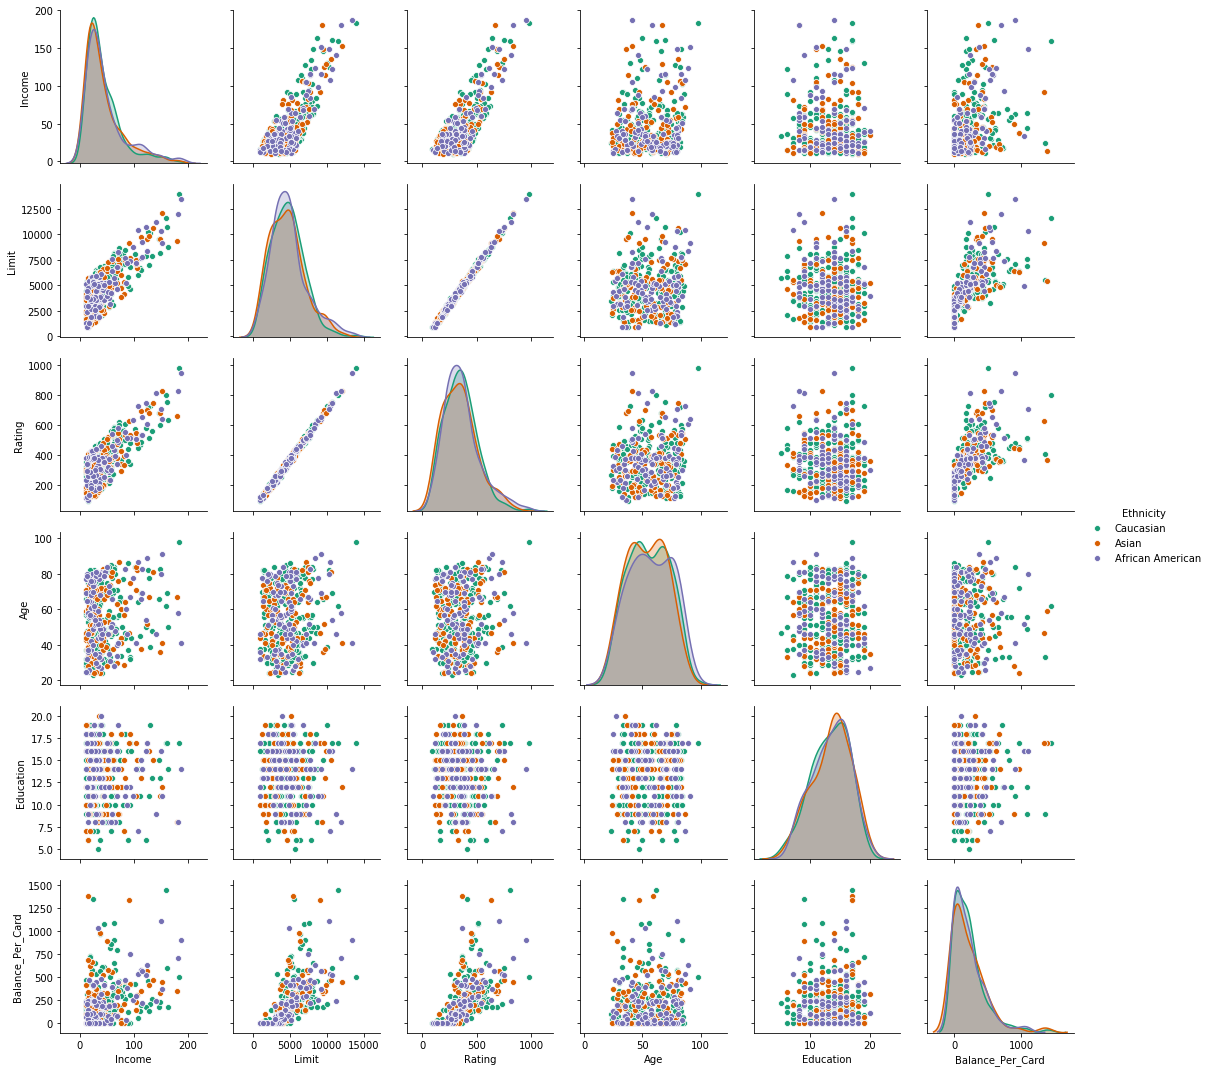

In [12]:
sns.pairplot(data=credit, hue = 'Ethnicity', diag_kind='kde',palette='Dark2')
plt.show()

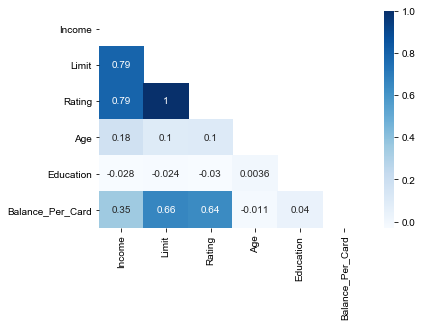

In [13]:
correlations = credit.corr()
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlations, mask=mask, cmap='Blues', annot = True)
sns.set(rc={'figure.figsize':(15,15)})
plt.show()

# Dummy Coding

In [14]:
for col in credit.columns:
    if credit[col].dtype == 'object':
        credit[col] = pd.Categorical(credit[col]).codes

In [15]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
Income              400 non-null float64
Limit               400 non-null int64
Rating              400 non-null int64
Age                 400 non-null int64
Education           400 non-null int64
Gender              400 non-null int8
Student             400 non-null int8
Married             400 non-null int8
Ethnicity           400 non-null int8
Balance_Per_Card    400 non-null float64
dtypes: float64(2), int64(4), int8(4)
memory usage: 20.4 KB


# Creating Features and Labels

In [16]:
X = credit.drop(['Balance_Per_Card'],1)
y = credit['Balance_Per_Card']

In [17]:
X.head()
y.head()

,Income,Limit,Rating,Age,Education,Gender,Student,Married,Ethnicity
0,14.891,3606,283,34,11,1,0,1,2
1,106.025,6645,483,82,15,0,1,1,1
2,104.593,7075,514,71,11,1,0,0,1
3,148.924,9504,681,36,11,0,0,0,1
4,55.882,4897,357,68,16,1,0,1,2


0    166.500000
1    301.000000
2    145.000000
3    321.333333
4    165.500000
Name: Balance_Per_Card, dtype: float64

# Import Decision Tree Regression

In [18]:
from sklearn import tree
reg = tree.DecisionTreeRegressor(min_samples_leaf=30)
reg = reg.fit(X,y)

In [19]:
import os

os.environ["PATH"]+=os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'

In [23]:
import graphviz
dot_data = tree.export_graphviz(reg, out_file=None,
                                feature_names=columns,
                                class_names=y,
                                rounded=True,
                                filled=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph
graph.render('credit')

NameError: name 'columns' is not defined

In [ ]:
import graphviz
with open('tree.dot', 'w') as datafile :
    

# Prediction

In [ ]:
predict = reg.predict(X)
predict